Report:
Es gibt bei der Kabine sowie beim Alter vor allem fehlende Einträge. 

Am Meisten Zusammenhänge bestehen zwischen dem Überleben und den Eigenschaften: Klasse, Alter, Geschlecht. Höchstwahrscheinlich haben Name, Fare und die Id kaum Auswirkungen auf das Überleben. Die Zimmernummer könnte mit in das Endergebnis einfließen, jedoch fehlen hier zu viele Werte für eine brauchbare Auswertung.


In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path


#creating the visualizations

data = pd.read_csv(Path('./titanic.csv').absolute())
passenger_class = data["Pclass"]
passenger_survived = data["Survived"]
passenger_sex = data["Sex"].map(lambda x: 0 if x == "male" else 1)
passenger_Age = data["Age"]

def plot_survived_vs_not_survived(data):
    data["Age"] = data["Age"].fillna(data["Age"].median())
    survived = data[data["Survived"] == 1]["Age"]
    died = data[data["Survived"] == 0]["Age"]

    plt.boxplot([died, survived])
    plt.xlabel("survival")
    plt.ylabel("age")
    plt.title("Age vs survival")
    plt.show()

def survival_by_class(data):
    class_groups = data.groupby("Pclass")["Survived"].mean()
    plt.bar(class_groups.index, class_groups.values)
    plt.title("Überleben nach Klassse")
    plt.show()

def age_hist(data):
    plt.hist(data["Age"].dropna())
    plt.title("Alterhistogramm aller Passagiere")
    plt.show()

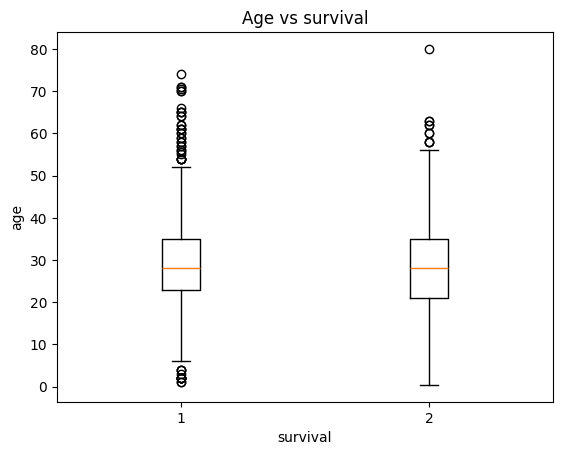

In [6]:
plot_survived_vs_not_survived(data)

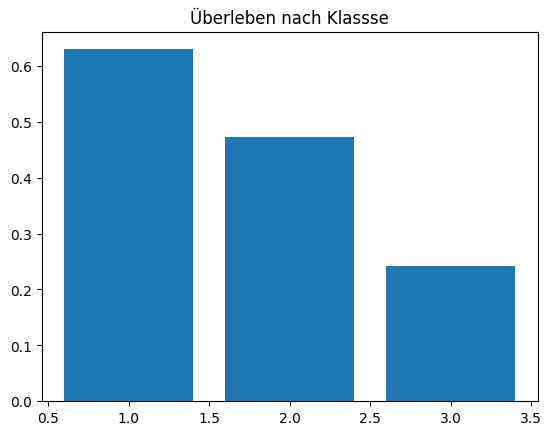

In [7]:
survival_by_class(data)

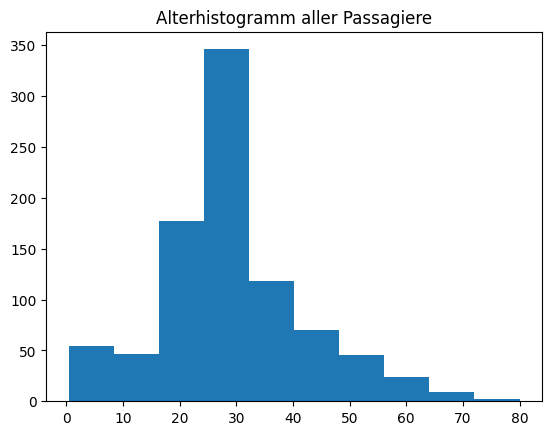

In [8]:
age_hist(data)

In [ ]:
from sklearn import linear_model, tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef

class SurvivalRatePredictor:
    def __init__(self, data):
        self._train_model_random_forest(data) ## Hier kann man die Funktion zu _train_model(data) ändern um eine lineare Regression zu machen

    def _split_data(self):
        x=self.cleaned_data[["Pclass", "Sex", "Age"]]
        y=self.cleaned_data[["Survived"]]

        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(x, y, test_size=0.2, stratify=y)

    def _clean_data(self, data):
        data["Sex"] = data["Sex"].map(lambda x: 0 if x == "male" else 1)
        
        average_age = data["Age"].median()
        data["Age"] = data["Age"].fillna(average_age)
        
        data = data[["Pclass", "Sex", "Age", "Survived"]]
        data = data.fillna(0)
        self.cleaned_data = data

    def _train_model(self, data): # linear regression model
        self._clean_data(data)
        self._split_data()
        self.predictor = linear_model.LinearRegression()
        self.predictor.fit(self.x_train, self.y_train) 
        self.model = "lineare Regression"
    
    def _train_model_random_forest(self, data): # random forest
        self._clean_data(data)
        self._split_data()
        self.predictor = tree.DecisionTreeRegressor(max_depth=22)
        self.predictor.fit(self.x_train, self.y_train) 
        self.model = "random forest"

    def predict(self, pclass, sex, age):
        if sex == "male":
            sex = 0
        else:
            sex = 1
        passenger_attributes = pd.DataFrame({
            "Pclass" : [pclass],
            "Sex" : [sex],
            "Age" : [age]
        })
        
        return self.predictor.predict(passenger_attributes)
    
    def test(self):
        predictet_results = self.predictor.predict(self.x_test)
        rounded_results = np.round(predictet_results)
        results = matthews_corrcoef(self.y_test, rounded_results)
        print(f"Die Wahrscheinlichkeit für eine Korrekte Vorhersage mit dem Modell {self.model} ist: {results}")
        return results


In [ ]:
titanic_survival_rate = SurvivalRatePredictor(data)
titanic_survival_rate.test()

#matthescorcoef: ca. 6740919660927036 

Die Wahrscheinlichkeit für eine Korrekte Vorhersage mit dem Modell random forest ist: 0.6740919660927036


0.6740919660927036

In [ ]:
#single passenger
titanic_survival_rate.predict(1,"female", 12)